In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-dataset/laptop_price - dataset.csv


In [7]:
import pandas as pd
df = pd.read_csv("/kaggle/input/laptop-price-dataset/laptop_price - dataset.csv")
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


In [8]:
pd.get_dummies(df["CPU_Company"])

,AMD,Intel,Samsung
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1270,False,True,False
1271,False,True,False
1272,False,True,False
1273,False,True,False


In [9]:
df.columns.isna().any()

False

In [10]:
df2 = pd.DataFrame(df["CPU_Company"].value_counts())
df2.index.name = "Company"
df2.rename(columns={"count": "Number"}, inplace=True)
df2

,Number
Company,
Intel,1214
AMD,60
Samsung,1


In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression()

In [12]:
lm.fit(df[["RAM (GB)"]], df[["Price (Euro)"]])

LinearRegression()

In [13]:
df[["RAM (GB)"]].head(5)

,RAM (GB)
0,8
1,8
2,8
3,16
4,8


In [14]:
df[["Price (Euro)"]].head(5)

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [15]:
lm.predict(np.array(8.0).reshape(-1, 1))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1090.11445304]])

In [16]:
lm.coef_

array([[101.76089391]])

In [17]:
lm.intercept_

array([276.02730172])

In [18]:
# Price = 276.02730172 + 101.76089391x

In [19]:
import numpy as np
new_input = np.arange(4, 33, 4).reshape(-1, 1)
new_input

array([[ 4],
       [ 8],
       [12],
       [16],
       [20],
       [24],
       [28],
       [32]])

In [20]:
yhat = lm.predict(new_input)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
yhat

array([[ 683.07087738],
       [1090.11445304],
       [1497.15802869],
       [1904.20160435],
       [2311.24518   ],
       [2718.28875566],
       [3125.33233131],
       [3532.37590697]])

In [22]:
print("The coefficient of RAM (GB):", lm.coef_, "The intercept:", lm.intercept_)

The coefficient of RAM (GB): [[101.76089391]] The intercept: [276.02730172]


In [23]:
df[["RAM (GB)", "Price (Euro)"]].corr()

,RAM (GB),Price (Euro)
RAM (GB),1.000000,0.740287
Price (Euro),0.740287,1.000000


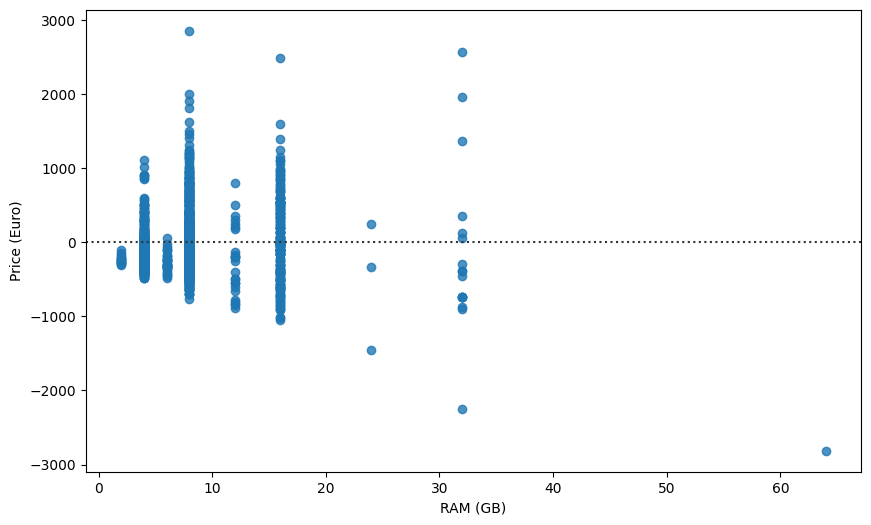

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
width = 10
height = 6
plt.figure(figsize=(width, height))
sns.residplot(x=df["RAM (GB)"], y=df["Price (Euro)"])
plt.show()

/tmp/ipykernel_36/3303265560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["RAM (GB)"]], hist=False, color="r", label="Actual value")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

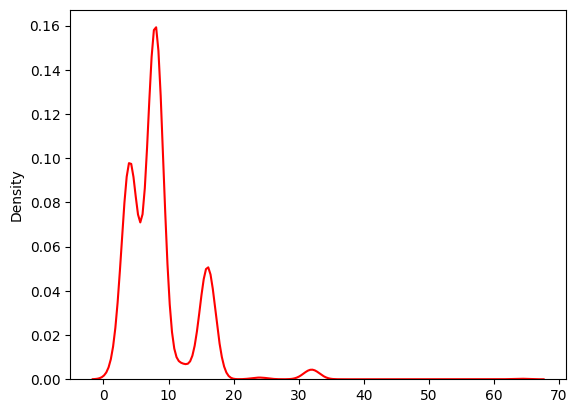

In [25]:
sns.distplot(df[["RAM (GB)"]], hist=False, color="r", label="Actual value")

/tmp/ipykernel_36/3742834715.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat_, hist=False, color="r", label="Predicted value")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

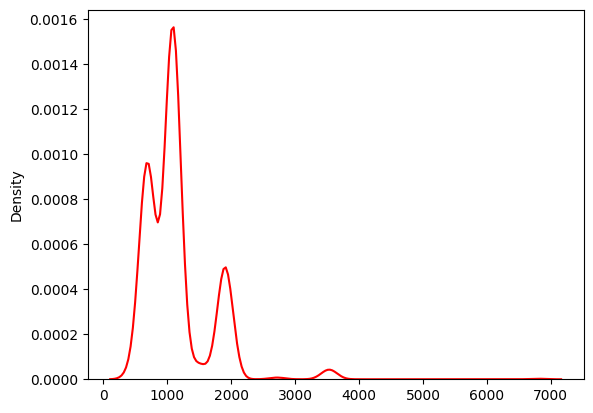

In [26]:
yhat_ = lm.predict(df[["RAM (GB)"]])
sns.distplot(yhat_, hist=False, color="r", label="Predicted value")

In [27]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data1 = scaler.fit_transform(df[["RAM (GB)"]])
# data2 = scaler.transform(yhat_.reshape(-1, 1))

# ax1 = sns.distplot(data1, hist=False, color="r", label="Actual value")
# sns.distplot(data2, hist=False, color="b", label="Predicted value", ax=ax1)

# plt.title("Actual values vs Predicted values")
# plt.xlabel("Price in Euro")
# plt.ylabel("RAM Storage")
# plt.legend()

In [28]:
lm.score(df[["RAM (GB)"]], df[["Price (Euro)"]])

0.5480241422979745

In [29]:
lm.score(df[["RAM (GB)"]], df[["Price (Euro)"]])

0.5480241422979745

In [30]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
Z_pr = pr.fit_transform(df[["RAM (GB)", "CPU_Frequency (GHz)"]])

In [31]:
Z_pr

array([[ 1.  ,  8.  ,  2.3 , 64.  , 18.4 ,  5.29],
       [ 1.  ,  8.  ,  1.8 , 64.  , 14.4 ,  3.24],
       [ 1.  ,  8.  ,  2.5 , 64.  , 20.  ,  6.25],
       ...,
       [ 1.  ,  2.  ,  1.6 ,  4.  ,  3.2 ,  2.56],
       [ 1.  ,  6.  ,  2.5 , 36.  , 15.  ,  6.25],
       [ 1.  ,  4.  ,  1.6 , 16.  ,  6.4 ,  2.56]])

In [32]:
x_train = df.iloc[:, :14]
x_train = x_train[["Inches", "CPU_Frequency (GHz)", "RAM (GB)", "Weight (kg)"]]
x_train

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg)
0,13.3,2.3,8,1.37
1,13.3,1.8,8,1.34
2,15.6,2.5,8,1.86
3,15.4,2.7,16,1.83
4,13.3,3.1,8,1.37
...,...,...,...,...
1270,14.0,2.5,4,1.80
1271,13.3,2.5,16,1.30
1272,14.0,1.6,2,1.50
1273,15.6,2.5,6,2.19


In [33]:
y_train = df.iloc[:, 14:]
y_train

,Price (Euro)
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60
...,...
1270,638.00
1271,1499.00
1272,229.00
1273,764.00


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=0)

In [35]:
x_train

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg)
466,15.6,2.0,4,2.20
501,15.6,2.5,8,1.91
474,15.6,2.6,12,2.06
239,15.6,2.5,8,2.50
1122,14.0,2.3,8,1.43
...,...,...,...,...
763,13.3,2.5,8,1.20
835,15.6,2.8,16,3.21
1216,17.3,2.0,4,3.30
559,15.6,2.0,4,2.18


In [36]:
x_test

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg)
699,15.6,2.7,4,2.10
649,12.5,2.7,8,1.36
310,13.3,2.5,8,1.10
186,15.6,2.8,16,2.06
184,15.6,1.6,8,1.95
...,...,...,...,...
386,13.3,2.4,4,1.50
724,17.3,2.8,8,2.70
625,15.6,2.7,8,2.20
795,14.0,2.5,8,1.42


In [37]:
y_train

,Price (Euro)
466,469.00
501,618.99
474,1299.00
239,846.00
1122,1513.00
...,...
763,1129.00
835,2774.63
1216,598.00
559,617.90


In [38]:
y_test

,Price (Euro)
699,689.00
649,1584.00
310,999.00
186,2397.00
184,1199.00
...,...
386,549.00
724,1348.48
625,899.00
795,2330.00


In [39]:
mlr = LinearRegression()
mlr.fit(x_train, y_train)
yhat_ = mlr.predict(x_test)

In [40]:
yhat_

array([[ 795.53545412],
       [1413.73064791],
       [1271.6062709 ],
       [1899.07688076],
       [ 825.5780386 ],
       [ 890.85274543],
       [ 593.58987845],
       [ 944.8672763 ],
       [ 952.13190595],
       [1220.4418829 ],
       [ 744.06354363],
       [1279.44476635],
       [ 924.87772273],
       [1194.34269617],
       [1085.89692293],
       [ 883.64026433],
       [ 982.24853289],
       [ 728.0813584 ],
       [1337.97067218],
       [ 685.32700349],
       [ 811.42075118],
       [ 626.28294087],
       [ 731.71367322],
       [1205.23964065],
       [1134.57217058],
       [ 395.38741946],
       [ 887.94689357],
       [ 744.7900066 ],
       [ 592.86341549],
       [1215.04911966],
       [ 814.96121377],
       [ 662.67139118],
       [2707.80117262],
       [ 648.69410377],
       [3257.4247489 ],
       [1154.07748162],
       [1279.44476635],
       [1069.60498623],
       [1827.66889672],
       [1278.87090055],
       [1089.89246924],
       [1028.613

In [41]:
len(yhat_)

383

/tmp/ipykernel_36/1658928385.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(yhat_, hist=True, color="g", label="Predicted values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Proportion of Laptop Prices based on features')

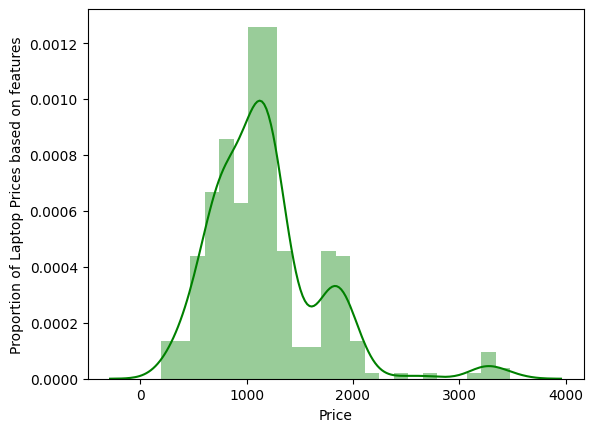

In [42]:
ax1 = sns.distplot(yhat_, hist=True, color="g", label="Predicted values")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptop Prices based on features")

/tmp/ipykernel_36/1405016626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[["Price (Euro)"]], hist=True, color="r", label="Actual values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Proportion of Laptop Prices')

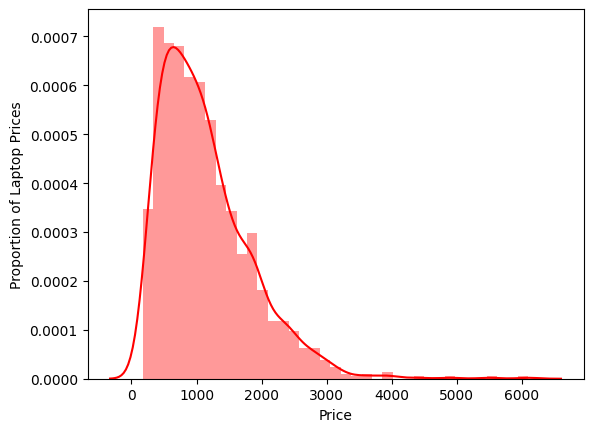

In [43]:
sns.distplot(df[["Price (Euro)"]], hist=True, color="r", label="Actual values")
plt.xlabel("Price")
plt.ylabel("Proportion of Laptop Prices")

/tmp/ipykernel_36/912867419.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(yhat_, hist=False, color="g", label="Predicted values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/912867419.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplo

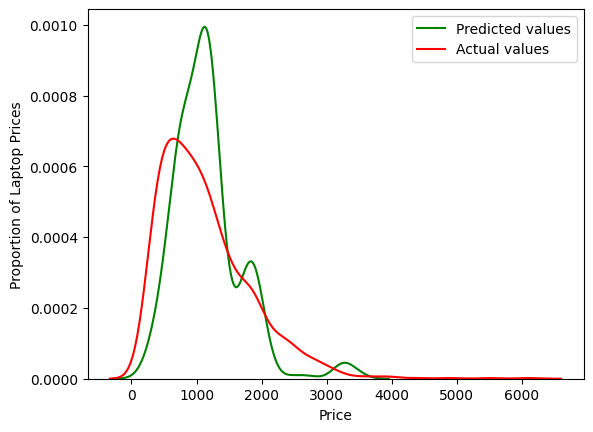

In [44]:
ax1 = sns.distplot(yhat_, hist=False, color="g", label="Predicted values")

sns.distplot(df[["Price (Euro)"]], hist=False, color="r", label="Actual values", ax=ax1)
plt.xlabel("Price")
plt.ylabel("Proportion of Laptop Prices")

plt.legend()

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlr, x_train, y_train, cv=3)

In [46]:
scores

array([0.56740531, 0.56217776, 0.53999547])

In [47]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha=0.1)

In [48]:
RidgeModel

Ridge(alpha=0.1)

In [49]:
type(RidgeModel)

sklearn.linear_model._ridge.Ridge

In [50]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [51]:
Yhat__ = RidgeModel.predict(x_test)

In [54]:
Yhat__[0:5]

array([[ 795.46273765],
       [1413.60160986],
       [1271.55612992],
       [1899.06176388],
       [ 825.71262967]])

/tmp/ipykernel_36/2339960098.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat__, hist=False, color="b", label="Fitted values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

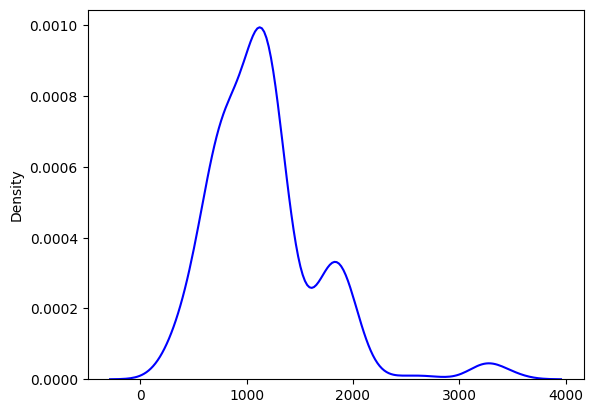

In [55]:
sns.distplot(Yhat__, hist=False, color="b", label="Fitted values")

/tmp/ipykernel_36/3269781982.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat2__, hist=False, color="b", label="Fitted values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

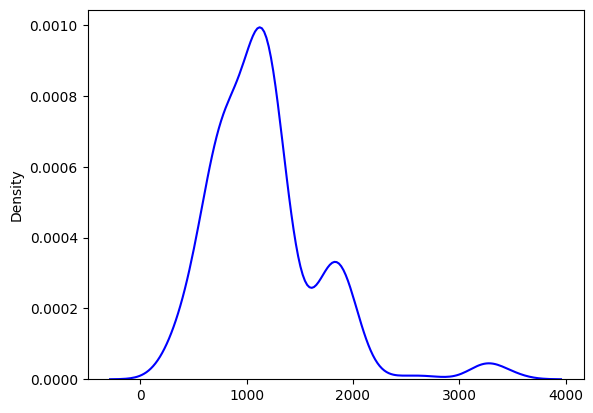

In [59]:
from sklearn.linear_model import Ridge
RidgeModel2 = Ridge(alpha=0)
RidgeModel2.fit(x_train, y_train)

Yhat2__ = RidgeModel2.predict(x_test)

sns.distplot(Yhat2__, hist=False, color="b", label="Fitted values")

/tmp/ipykernel_36/593943801.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat3__, hist=False, color="b", label="Fitted values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

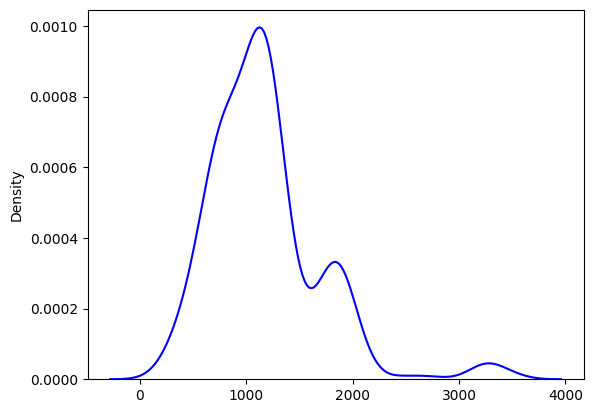

In [60]:
from sklearn.linear_model import Ridge
RidgeModel3 = Ridge(alpha=1)
RidgeModel3.fit(x_train, y_train)

Yhat3__ = RidgeModel3.predict(x_test)

sns.distplot(Yhat3__, hist=False, color="b", label="Fitted values")

/tmp/ipykernel_36/10079029.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat4__, hist=False, color="b", label="Fitted values")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

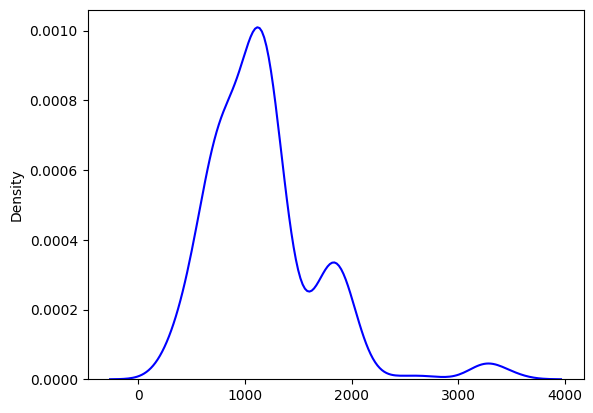

In [63]:
from sklearn.linear_model import Ridge
RidgeModel4 = Ridge(alpha=10)
RidgeModel4.fit(x_train, y_train)

Yhat4__ = RidgeModel4.predict(x_test)

sns.distplot(Yhat4__, hist=False, color="b", label="Fitted values")

/tmp/ipykernel_36/1688632252.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, hist=False, color="yellow", label="Actual")
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_36/1688632252.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (a

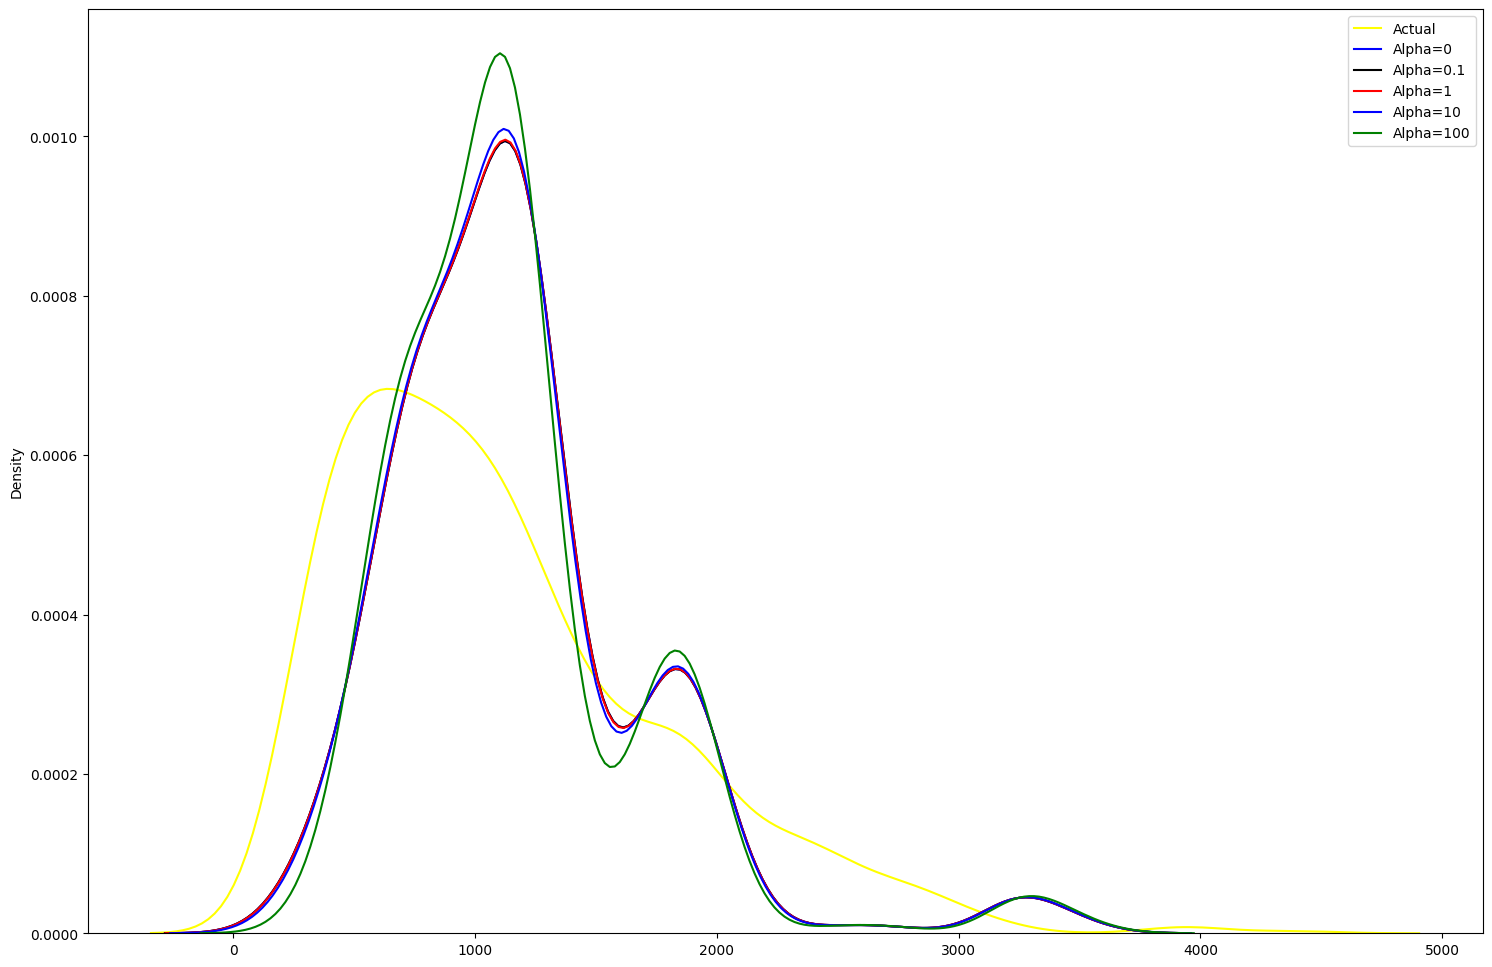

In [80]:
plt.figure(figsize=(18,12))

RidgeModel1 = Ridge(alpha=1)
RidgeModel1.fit(x_train, y_train)
Yhat1__ = RidgeModel1.predict(x_test) #Pierwsze oznaki niedopasowania

RidgeModel4 = Ridge(alpha=10)
RidgeModel4.fit(x_train, y_train)
Yhat4__ = RidgeModel4.predict(x_test) #Duże niedopasowanie

RidgeModel5 = Ridge(alpha=100)
RidgeModel5.fit(x_train, y_train)
Yhat5__ = RidgeModel5.predict(x_test) #Bardzo duże niedopasowanie

RidgeModel6 = Ridge(alpha=0)
RidgeModel6.fit(x_train, y_train)
Yhat6__ = RidgeModel6.predict(x_test) #Nadmierne dopasowanie

RidgeModel7 = Ridge(alpha=0)
RidgeModel7.fit(x_train, y_train)
Yhat7__ = RidgeModel7.predict(x_test) #Szacowana funkcja śledzi rzeczywistą funkcję

sns.distplot(y_train, hist=False, color="yellow", label="Actual")
sns.distplot(Yhat6__, hist=False, color="blue", label="Alpha=0")
sns.distplot(Yhat7__, hist=False, color="black", label="Alpha=0.1")
sns.distplot(Yhat1__, hist=False, color="r", label="Alpha=1")
sns.distplot(Yhat4__, hist=False, color="b", label="Alpha=10")
sns.distplot(Yhat5__, hist=False, color="g", label="Alpha=100")

plt.legend()

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [121]:
parameters1 = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000]}]

In [122]:
RR = Ridge()

In [123]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000]}])

In [124]:
Grid1.best_estimator_

Ridge(alpha=1)

In [125]:
Grid1.best_score_

0.5651078274811897

In [126]:
scores = Grid1.cv_results_
scores['mean_test_score']

array([0.56509569, 0.56509712, 0.56510783, 0.56501476, 0.55790205,
       0.53021978, 0.4467371 ])

In [132]:
for param, mean_val in zip(scores['params'], scores["mean_test_score"]):
    print(param, "R^2 on test data:", mean_val)

{'alpha': 0.001} R^2 on test data: 0.5650956860756318
{'alpha': 0.1} R^2 on test data: 0.5650971221982009
{'alpha': 1} R^2 on test data: 0.5651078274811897
{'alpha': 10} R^2 on test data: 0.5650147569352192
{'alpha': 100} R^2 on test data: 0.5579020507967869
{'alpha': 1000} R^2 on test data: 0.5302197819538682
{'alpha': 10000} R^2 on test data: 0.44673709940303147


In [130]:
scores

{'mean_fit_time': array([0.00373179, 0.0029912 , 0.00300604, 0.00292909, 0.0029881 ,
        0.00295389, 0.0029645 ]),
 'std_fit_time': array([6.49486242e-04, 4.13949859e-05, 7.64153630e-05, 3.13561223e-05,
        5.93252788e-05, 5.31137254e-05, 1.95059330e-05]),
 'mean_score_time': array([0.0023824 , 0.00218564, 0.00213885, 0.00213337, 0.00212336,
        0.00214553, 0.00210893]),
 'std_score_time': array([1.42135521e-04, 3.26769928e-05, 2.24936273e-05, 2.91773107e-05,
        1.21441447e-05, 4.90522688e-05, 1.39230122e-05]),
 'param_alpha': masked_array(data=[0.001, 0.1, 1, 10, 100, 1000, 10000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 100},
  {'alpha': 1000},
  {'alpha': 10000}],
 'split0_test_score': array([0.57219183, 0.57222274, 0.57249799, 0.57475198, 0.57766551,
        0.54610977, 0.42401236]),
 'split1_